In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [2]:
shobdotori_path = kagglehub.competition_download('shobdotori')

print('Data source import complete.')


Data source import complete.


# Environment setup

To ensure compatibility with Kaggle’s pre-installed environment, we are using specific versions of libraries.  
The latest version of `datasets` requires `torchcodec` and `ffmpeg`, which conflict with Kaggle’s setup.  
To avoid dependency issues, we are pinning older versions of `datasets`, `numpy`, and `scikit-learn`.

### Package Versions
- **protobuf** = 3.2  
- **datasets** = 3.6.0  
- **numpy** = 1.26  
- **scikit-learn** = 1.3.2  
- **transformers** = 4.48.3  

We are using the **BanglaASR model**, a fine-tuned version of **Whisper Small**.

---

### Training Data
- Original dataset: split into **20 subdirectories** (regional splits)  
- Each subdirectory had a corresponding **CSV file**  
- All CSVs were **merged into one consolidated file** for training




In [3]:
from huggingface_hub import notebook_login

# This will open a prompt for your Hugging Face token
notebook_login()

In [4]:
!pip install --upgrade --force-reinstall numpy==1.26.4 scikit-learn==1.3.2
!pip install protobuf==3.20.*
!pip install datasets==3.6.0 transformers==4.48.3 torchaudio accelerate evaluate
!pip install bitsandbytes

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


import numpy, sklearn
print("numpy:", numpy.__version__)
print("scikit-learn:", sklearn.__version__)

  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scikit_learn-1.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached scipy-1.16.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (62 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
Using cached scikit_learn-1.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached scipy-1.16.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (35.7 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully u

  Using cached protobuf-3.20.3-py2.py3-none-any.whl.metadata (720 bytes)
Using cached protobuf-3.20.3-py2.py3-none-any.whl (162 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.
ydf 0.13.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 3.20.3 which is incompatible.
tensorflow-metadata 1.17.2 requires protobuf>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=5.0, but you have protobuf 3.20.3 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.3 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.22.1
    Uninstalling tokenizers-0.22.1:
      Successfully uninstalled tokenizers-0.22.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.57.1
    Uninstalling transformers-4.57.1:
      Successfully uninstalled transformers-4.57.1
  Attempting uninstall: datasets
    Found existing installation: datasets 4.0.0
    Uninstalling datasets-4.0.0:
      Successfully uninstalled datasets-4.0.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 MB 12.9 MB/s eta 0:00:00
numpy: 1.26.4
scik

**All the installations nad dependencies**

In [5]:
!pip install jiwer
!pip install SoundFile
!pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 6.5 MB/s eta 0:00:00


In [6]:
import google.protobuf
import transformers, datasets
print("protobuf:", google.protobuf.__version__)
print("transformers:", transformers.__version__)
print("datasets:", datasets.__version__)

protobuf: 3.20.3
transformers: 4.48.3
datasets: 3.6.0


In [7]:
import torch

# Pick GPU if available, otherwise CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
from transformers import WhisperProcessor, WhisperForConditionalGeneration


processor = WhisperProcessor.from_pretrained(
"bangla-speech-processing/BanglaASR",
language="bn",
task="transcribe"
)

model = WhisperForConditionalGeneration.from_pretrained("bangla-speech-processing/BanglaASR")

if model.config.pad_token_id is None:
  model.config.pad_token_id = processor.tokenizer.pad_token_id = processor.tokenizer.eos_token_id
  print(f" Set pad_token_id to: {model.config.pad_token_id} (EOS token ID)")
elif processor.tokenizer.pad_token_id is None:
  processor.tokenizer.pad_token_id = model.config.pad_token_id
  print(f" Set processor.tokenizer.pad_token_id to: {processor.tokenizer.pad_token_id}")


forced_decoder_ids = processor.get_decoder_prompt_ids(
language="bn",
task="transcribe"
)
model.config.forced_decoder_ids = forced_decoder_ids
model.config.suppress_tokens = None
model.config.use_cache = False

model.config.dropout = 0.1
model.config.attention_dropout = 0.1
print("Model and processor loaded successfully!")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/339 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/805 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

normalizer.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json: 0.00B [00:00, ?B/s]

Model and processor loaded successfully!


In [9]:
import csv
from pathlib import Path
import shutil
import sys

# Input root inside Kaggle
INPUT_ROOT = Path(shobdotori_path)
# Adjust these names if your dataset repo uses different folder names
TRAIN_DIR = INPUT_ROOT / "Train"
ANNOT_DIR = INPUT_ROOT / "Train_annotation"

if not TRAIN_DIR.exists() or not ANNOT_DIR.exists():
    print("Expected Train/ and Train_annotation/ under /kaggle/input. Found:")
    print("Train exists:", TRAIN_DIR.exists())
    print("Train_annotation exists:", ANNOT_DIR.exists())
    raise SystemExit(1)

# Output to working dir (writable)
OUT_ROOT = Path("/kaggle/working")
OUT_TRAIN = OUT_ROOT / "Train_all"
OUT_CSV = OUT_ROOT / "Train_annotation_all.csv"

OUT_TRAIN.mkdir(parents=True, exist_ok=True)

rows_out = []
total = 0
missing = []
skipped_audio_rows = 0
skipped_header_rows = 0

for csv_path in sorted(ANNOT_DIR.glob("*.csv")):
    region = csv_path.stem
    with csv_path.open(newline="", encoding="utf-8") as f:
        reader = csv.reader(f)
        for row in reader:
            if not row:
                continue

            filename = row[0].strip()
            text = row[1].strip() if len(row) > 1 else ""

            # Skip header rows like ["audio", "text"] (case-insensitive)
            if filename.lower() == "audio" and text.lower() == "text":
                skipped_header_rows += 1
                continue

            # Skip rows where filename == "audio" (legacy check)
            if filename.lower() == "audio":
                skipped_audio_rows += 1
                continue

            src = TRAIN_DIR / region / filename
            if not src.exists():
                missing.append(str(src))
                continue

            new_name = f"{region}__{Path(filename).name}"
            dest = OUT_TRAIN / new_name
            if not dest.exists():
                shutil.copy2(src, dest)

            rows_out.append([str(dest), text, region])
            total += 1

# write merged CSV with header
with OUT_CSV.open("w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["audio_path", "text", "region"])
    writer.writerows(rows_out)

print(f"Copied {total} files to {OUT_TRAIN}")
print(f"Rows skipped because filename == 'audio': {skipped_audio_rows}")
print(f"Header rows skipped (audio,text): {skipped_header_rows}")
print(f"Created merged CSV: {OUT_CSV}")

if missing:
    print(f"WARNING: {len(missing)} audio files referenced in CSVs were not found. Example(s):")
    for m in missing[:5]:
        print(" ", m)


Copied 3350 files to /kaggle/working/Train_all
Rows skipped because filename == 'audio': 0
Header rows skipped (audio,text): 0
Created merged CSV: /kaggle/working/Train_annotation_all.csv
  /root/.cache/kagglehub/competitions/shobdotori/Train/Barisal/﻿audio
  /root/.cache/kagglehub/competitions/shobdotori/Train/Bhola/﻿audio
  /root/.cache/kagglehub/competitions/shobdotori/Train/Bogura/﻿audio
  /root/.cache/kagglehub/competitions/shobdotori/Train/Brahmanbaria/﻿audio
  /root/.cache/kagglehub/competitions/shobdotori/Train/Chittagong/﻿audio


In [10]:

from jiwer import wer

In [11]:

import soundfile as sf

# Dataset Exploration and Initial Model Performance Observation

### Data Inspection
- We begin by examining the **first 10 rows** of the dataset to verify structure, formatting, and consistency.  
- This step helps ensure that the merged CSV file is correctly aligned with the expected schema.

### Initial Model Check
- Before any training, we run the **BanglaASR (Whisper Small fine-tuned)** model on **20 random audio files** containing regional dialects.  
- As expected, the model’s transcription quality is **poor** at this stage, highlighting the need for fine-tuning with our dataset.

In [12]:
import pandas as pd
df=pd.read_csv("/kaggle/working/Train_annotation_all.csv")
print(df.columns)
df.head(10)

Index(['audio_path', 'text', 'region'], dtype='object')


,audio_path,text,region
0,/kaggle/working/Train_all/Barisal__female_bari...,আজ সকালে আমি বাজারে গিয়েছিলাম।,Barisal
1,/kaggle/working/Train_all/Barisal__female_bari...,আকাশে আজ মেঘ জমে আছে।,Barisal
2,/kaggle/working/Train_all/Barisal__female_bari...,আমি বন্ধুদের সাথে খেলা খেলেছি।,Barisal
3,/kaggle/working/Train_all/Barisal__female_bari...,দরজাটা ধীরে ধীরে বন্ধ করে দাও।,Barisal
4,/kaggle/working/Train_all/Barisal__female_bari...,তুমি কি আমাকে পানি দিতে পারো?,Barisal
5,/kaggle/working/Train_all/Barisal__female_bari...,আমরা সবাই একসাথে হাঁটতে যাচ্ছি।,Barisal
6,/kaggle/working/Train_all/Barisal__female_bari...,আমি নতুন মোবাইল কিনতে যাচ্ছি।,Barisal
7,/kaggle/working/Train_all/Barisal__female_bari...,তুমি কি কখনো নদীর ধারে গিয়েছো?,Barisal
8,/kaggle/working/Train_all/Barisal__female_bari...,আজ রাস্তায় প্রচুর যানজট হয়েছে।,Barisal
9,/kaggle/working/Train_all/Barisal__female_bari...,তুমি কি আমাকে কলমটা দেবে?,Barisal


In [14]:
import librosa
import soundfile as sf
import numpy as np
import torch
model = model.to("cuda")


wer_score = []
reference_transcripts = []
predicted_transcripts = []

for i, path in enumerate(df['audio_path'].iloc[:20]):

    speech_array, sampling_rate = sf.read(path)


    speech_array = librosa.resample(
        np.asarray(speech_array), orig_sr=sampling_rate, target_sr=16000
    )


    inputs = processor(
        audio=speech_array,
        sampling_rate=16000,
        return_tensors="pt"
    )

    input_features = inputs["input_features"].to(device)


    predicted_ids = model.generate(
        input_features,
        language="bn"
    )[0]

    # Decode prediction
    transcription = processor.batch_decode([predicted_ids], skip_special_tokens=True)[0]

    # Collect results
    reference_transcripts.append(df['text'].iloc[i])
    predicted_transcripts.append(transcription)

    print('🟩', df['text'].iloc[i], '🟨', transcription)

You have passed language=bn, but also have set `forced_decoder_ids` to [[1, None], [2, 50359]] which creates a conflict. `forced_decoder_ids` will be ignored in favor of language=bn.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


🟩 আজ সকালে আমি বাজারে গিয়েছিলাম। 🟨 মাসিজব বেনিয়ালমি বাজার কেছিলাম।
🟩 আকাশে আজ মেঘ জমে আছে। 🟨 আইজগু আকাশে মেঘ জম্মে আছে।
🟩 আমি বন্ধুদের সাথে খেলা খেলেছি। 🟨 মুই দস্ত গোলকে খেলা খেলসি বা মুই বন্ধু গোলকে খেলা খেলসি।
🟩 দরজাটা ধীরে ধীরে বন্ধ করে দাও। 🟨 দরজাড়া আস্ত্যাস্তে আটকাইয়াদে।
🟩 তুমি কি আমাকে পানি দিতে পারো? 🟨 উইকেম মোরে একটু পানি দিতে পারবে?
🟩 আমরা সবাই একসাথে হাঁটতে যাচ্ছি। 🟨 মোরাসভাই একলগে হাঁতে যাইতে আছি।
🟩 আমি নতুন মোবাইল কিনতে যাচ্ছি। 🟨 মুই নতুন মোকাল কিন্তো যাইতে আছি।
🟩 তুমি কি কখনো নদীর ধারে গিয়েছো? 🟨 তুয়িক ওনোই প্রতির পাড়ে গেশলী?
🟩 আজ রাস্তায় প্রচুর যানজট হয়েছে। 🟨 পারিস্কট রাষ্টা প্রসুর জ্যাম লাগসে।
🟩 তুমি কি আমাকে কলমটা দেবে? 🟨 উইকিম্বরে কলমরা দেবী।
🟩 আমাদের স্কুলে আজ বড় অনুষ্ঠান আছে। 🟨 হাইজগমগু স্কুলে মেলাভারের অনুষ্ঠ নেয়ছে।
🟩 আমি সকালের নাস্তা খেতে ভুলে গেছি। 🟨 মুই বেইন্নালের খাওন খাইতো ভূলে গেছে।
🟩 তুমি কি আজ সিনেমা দেখতে যাবে? 🟨 টুইকেলসগো সিনেমা দেখতে যাবি?
🟩 আমি আজ বাজার থেকে ফল কিনেছি। 🟨 মুয়েজগ হার্টিক ফলকেন্সি।
🟩 আমাদের গ্রামের বাতাস খুব শীতল। 🟨 মোগো গ্রামের

In [15]:
wer_scores = [wer(ref, hyp) for ref, hyp in zip(reference_transcripts, predicted_transcripts)]
average_wer = sum(wer_scores) / len(wer_scores)
print(f"Average Word Error Rate: {average_wer:.2f}")

Average Word Error Rate: 0.96


**Use the dataset lib from hugging face toi format dataset for fine tuning**

In [16]:
from datasets import DatasetDict, Dataset
train_dataset = Dataset.from_pandas(df)
train_dataset = train_dataset.remove_columns(['region'])
train_dataset

Dataset({
    features: ['audio_path', 'text'],
    num_rows: 3350
})

# Dataset Preparation for Fine-Tuning

To prepare our dataset for Whisper fine-tuning, we follow a structured preprocessing pipeline.  
This ensures that audio files are correctly formatted and aligned with the model’s expected input.

---

### 1. Import Required Libraries
- **`datasets`**: Provides easy handling of large datasets and supports audio data.  
- **`Audio` feature type**: Used to cast the audio column so that each entry contains an audio array with sampling information.**Very important to sample at 16KHz**

---

### 2. Cast Audio Column
- The raw audio files are cast to the `Audio` type.  
- This step ensures that each audio sample is represented as a NumPy array with its sampling rate, making it compatible with the processor.

---

### 3. Feature Extraction
- We use the **WhisperProcessor** (combining tokenizer + feature extractor).  
- The audio arrays are transformed into **log-Mel spectrograms**, which are the expected input format for Whisper.  
- Whisper models expect **30-second chunks** of audio.  
  - If an audio file is shorter, **padding** is automatically added.  
  - Longer files are truncated to fit the 30s window.

---

### 4. Verification
- To confirm that preprocessing works correctly, we **plot the spectrograms** of sample audio files.  
- This helps verify that the audio is being read and transformed properly.

---

### 5. Clean the Dataset
- Unnecessary columns from the original dataframe are **dropped**.  
- Only the relevant features (`input_features` and `labels`) are retained for training.

---

### 6. Train/Validation Split
- The dataset is split into **training** and **validation** sets.  
- Each split is converted into a **dictionary format** so it can be easily passed into the Hugging Face `Trainer`.



In [17]:
from datasets import Dataset, Audio
import pandas as pd


df = pd.read_csv("/kaggle/working/Train_annotation_all.csv")


dataset = Dataset.from_pandas(df)


dataset = dataset.cast_column("audio_path", Audio(sampling_rate=16000))

# Now each row has:
# - "audio_path" -> automatically decoded into waveform when accessed
# - "text" -> transcription

In [18]:
example = dataset[0]
print(example["audio_path"])   # {'path': '...', 'array': np.ndarray, 'sampling_rate': 16000}
print(example["text"])         # transcription string

{'path': '/kaggle/working/Train_all/Barisal__female_barisal_1.wav', 'array': array([0., 0., 0., ..., 0., 0., 0.]), 'sampling_rate': 16000}
আজ সকালে আমি বাজারে গিয়েছিলাম।


In [19]:
import soundfile as sf

speech_array, sr = sf.read(dataset[0]["audio_path"]["path"])
print(speech_array[:20])   # first 20 samples
print(speech_array.shape)  # length in samples

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(51840,)


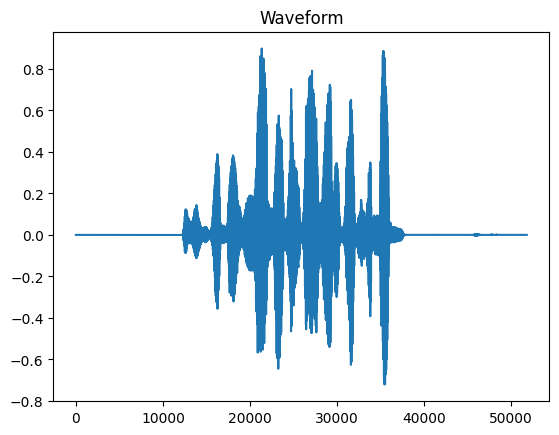

In [20]:
import matplotlib.pyplot as plt

plt.plot(speech_array)
plt.title("Waveform")
plt.show()

In [21]:
dataset= dataset.remove_columns(['region'])
example = dataset[0]
print(example)

{'audio_path': {'path': '/kaggle/working/Train_all/Barisal__female_barisal_1.wav', 'array': array([0., 0., 0., ..., 0., 0., 0.]), 'sampling_rate': 16000}, 'text': 'আজ সকালে আমি বাজারে গিয়েছিলাম।'}


We split the dataset to train and validation sets for evaluation

In [22]:
from datasets import DatasetDict

# Shuffle for randomness
dataset = dataset.shuffle(seed=42)


train_size = int(0.9 * len(dataset))
train_dataset = dataset.select(range(train_size))
valid_dataset = dataset.select(range(train_size, len(dataset)))

# Wrap into DatasetDict
dataset_dict = DatasetDict({
    "train": train_dataset,
    "validation": valid_dataset
})

In [23]:
print(dataset_dict)
print(dataset_dict["train"][0])   # one training example
print(dataset_dict["validation"][0])  # one validation example

DatasetDict({
    train: Dataset({
        features: ['audio_path', 'text'],
        num_rows: 3015
    })
    validation: Dataset({
        features: ['audio_path', 'text'],
        num_rows: 335
    })
})
{'audio_path': {'path': '/kaggle/working/Train_all/Chittagong__male_chittagong_62.wav', 'array': array([0., 0., 0., ..., 0., 0., 0.]), 'sampling_rate': 16000}, 'text': 'আজ বিকেলে আমরা হাঁটতে যাবো।'}
{'audio_path': {'path': '/kaggle/working/Train_all/Mymensingh__female_mymensingh_261.wav', 'array': array([ 0.        ,  0.        ,  0.        , ..., -0.00384521,
        0.00979614, -0.0138855 ]), 'sampling_rate': 16000}, 'text': 'আজ রাতে আকাশে পূর্ণিমার চাঁদ।'}


**Data Augmentations**

!!!Augmentations by gandu_notebook:


### CustomSpecAugment: SpecAugment for Audio Data Augmentation

This class implements SpecAugment, a data augmentation technique for speech recognition models. It applies random frequency and time masking to mel spectrograms, making models more robust to variations in the input.

#### Class: `CustomSpecAugment`

- **Initialization**
  - `freq_mask_param`: Maximum width (in mel bins) for frequency masking (default: 15).
  - `time_mask_param`: Maximum width (in frames) for time masking (default: 35).

- **Frequency Masking (`freq_mask`)**
  - Randomly selects a frequency band (horizontal stripe) and sets its values to zero.
  - Repeats this process `num_masks` times (default: 1).
  - This simulates missing frequency information in the spectrogram.

- **Time Masking (`time_mask`)**
  - Randomly selects a time interval (vertical stripe) and sets its values to zero.
  - Repeats this process `num_masks` times (default: 1).
  - This simulates missing temporal information in the spectrogram.

- **`__call__` Method**
  - Applies both frequency and time masking to the input spectrogram.
  - Returns the augmented spectrogram.

#### Example Usage

```python
spec_augment = CustomSpecAugment(freq_mask_param=15, time_mask_param=35)
augmented_spec = spec_augment(mel_spectrogram)

In [24]:
import torch
import numpy as np
class CustomSpecAugment:
  """
  SpecAugment for audio data augmentation
  Applies frequency and time masking to mel spectrograms
  """
  def __init__(self, freq_mask_param=15, time_mask_param=35):
    self.freq_mask_param = freq_mask_param
    self.time_mask_param = time_mask_param

  def freq_mask(self, spec, num_masks=1):
      """Apply frequency masking"""
      cloned = spec.copy()
      num_mel_channels = cloned.shape[0]

      for _ in range(num_masks):
          f = np.random.randint(0, self.freq_mask_param)
          f_zero = np.random.randint(0, num_mel_channels - f)
          cloned[f_zero:f_zero + f, :] = 0

      return cloned

  def time_mask(self, spec, num_masks=1):
      """Apply time masking"""
      cloned = spec.copy()
      len_spectro = cloned.shape[1]

      for _ in range(num_masks):
          t = np.random.randint(0, self.time_mask_param)
          t_zero = np.random.randint(0, len_spectro - t)
          cloned[:, t_zero:t_zero + t] = 0

      return cloned

  def __call__(self, spec):
      """Apply SpecAugment to mel spectrogram"""
      spec = self.freq_mask(spec, num_masks=1)
      spec = self.time_mask(spec, num_masks=1)
      return spec

In [25]:
spec_augment = CustomSpecAugment(freq_mask_param=15, time_mask_param=35)

In [26]:
import random
def prepare_dataset(batch):
    audio = batch["audio_path"]

    # Extract log-Mel features
    batch["input_features"] = processor.feature_extractor(
        audio["array"],
        sampling_rate=audio["sampling_rate"]
    ).input_features[0]
    if random.random() > 0.5 :
        try:
            batch['input_features'] = spec_augment(batch['input_features'])
        except Exception as e:
            pass

    # Encode text labels
    batch["labels"] = processor.tokenizer(batch["text"]).input_ids
    return batch



In [27]:
print(prepare_dataset(dataset_dict["train"][0]))

{'audio_path': {'path': '/kaggle/working/Train_all/Chittagong__male_chittagong_62.wav', 'array': array([0., 0., 0., ..., 0., 0., 0.]), 'sampling_rate': 16000}, 'text': 'আজ বিকেলে আমরা হাঁটতে যাবো।', 'input_features': array([[-1.5, -1.5, -1.5, ..., -1.5, -1.5, -1.5],
       [-1.5, -1.5, -1.5, ..., -1.5, -1.5, -1.5],
       [-1.5, -1.5, -1.5, ..., -1.5, -1.5, -1.5],
       ...,
       [-1.5, -1.5, -1.5, ..., -1.5, -1.5, -1.5],
       [-1.5, -1.5, -1.5, ..., -1.5, -1.5, -1.5],
       [-1.5, -1.5, -1.5, ..., -1.5, -1.5, -1.5]], dtype=float32), 'labels': [50258, 50302, 50359, 50363, 29045, 228, 29045, 250, 220, 156, 2250, 29045, 123, 29045, 243, 156, 100, 229, 29045, 110, 156, 100, 229, 220, 29045, 228, 29045, 106, 156, 12811, 29045, 122, 220, 29045, 117, 29045, 122, 29045, 223, 29045, 253, 29045, 97, 156, 100, 229, 220, 29045, 107, 29045, 122, 156, 2250, 156, 100, 233, 8703, 97, 50257]}


Final training ready dataset

In [28]:
dataset_dict["train"] = dataset_dict["train"].map(
    prepare_dataset,
    remove_columns=dataset_dict["train"].column_names,
    num_proc=1
)

dataset_dict["validation"] = dataset_dict["validation"].map(
    prepare_dataset,
    remove_columns=dataset_dict["validation"].column_names,
    num_proc=1
)


Map:   0%|          | 0/3015 [00:00<?, ? examples/s]

Map:   0%|          | 0/335 [00:00<?, ? examples/s]

In [29]:
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['input_features', 'labels'],
        num_rows: 3015
    })
    validation: Dataset({
        features: ['input_features', 'labels'],
        num_rows: 335
    })
})

# Data Collator
The data collator for a sequence-to-sequence speech model is unique in the sense that it treats the input_features and labels independently: the input_features must be handled by the feature extractor and the labels by the tokenizer.

The input_features are already padded to 30s and converted to a log-Mel spectrogram of fixed dimension, so all we have to do is convert them to batched PyTorch tensors. We do this using the feature extractor's .pad method with return_tensors=pt. Note that no additional padding is applied here since the inputs are of fixed dimension, the input_features are simply converted to PyTorch tensors.

On the other hand, the labels are un-padded. We first pad the sequences to the maximum length in the batch using the tokenizer's .pad method. The padding tokens are then replaced by -100 so that these tokens are not taken into account when computing the loss. We then cut the start of transcript token from the beginning of the label sequence as we append it later during training.

We can leverage the WhisperProcessor we defined earlier to perform both the feature extractor and the tokenizer operations:

In [43]:
import torch

from dataclasses import dataclass
from typing import Any, Dict, List, Union

@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: Any
    decoder_start_token_id: int

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        # split inputs and labels since they have to be of different lengths and need different padding methods
        # first treat the audio inputs by simply returning torch tensors
        input_features = [{"input_features": feature["input_features"]} for feature in features]
        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")

        # get the tokenized label sequences
        label_features = [{"input_ids": feature["labels"]} for feature in features]
        # pad the labels to max length
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")

        # create decoder_input_ids by shifting the labels_batch["input_ids"] to the right
        # and prepending the decoder_start_token_id
        decoder_input_ids = labels_batch["input_ids"].clone()
        # Shift tokens to the right
        shifted_input_ids = decoder_input_ids.new_zeros(decoder_input_ids.shape)
        shifted_input_ids[:, 1:] = decoder_input_ids[:, :-1].clone()
        shifted_input_ids[:, 0] = self.decoder_start_token_id

        batch["decoder_input_ids"] = shifted_input_ids

        # replace padding with -100 to ignore loss correctly for the original labels
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)

        # # if bos token is appended in previous tokenization step,
        # # cut bos token here as it's append later anyways
        # if (labels[:, 0] == self.decoder_start_token_id).all().cpu().item():
        #     labels = labels[:, 1:]

        batch["labels"] = labels

        return batch

In [44]:
data_collator = DataCollatorSpeechSeq2SeqWithPadding(
    processor=processor,
    decoder_start_token_id=model.config.decoder_start_token_id,
)


# Evaluation

To assess the performance of our fine-tuned Whisper model, we use both **Word Error Rate (WER)** and **Levenshtein similarity**.  
This dual evaluation provides a more complete picture of transcription quality.

---

### 1. Levenshtein Similarity
- The **Levenshtein distance** measures the minimum number of single-character edits (insertions, deletions, substitutions) required to transform one string into another.
- We normalize this distance to obtain a **similarity score** between 0 and 1:
  - `1.0` indicates identical strings.
  - Lower values indicate greater differences.
- Example: Comparing `"আজ বিকেলে আমরা হাঁটতে যাবো।"` with `"আজ বিকেলে আমরা হাঁটতে যাবো"` yields a similarity close to 1, since the only difference is punctuation.

---

### 2. Word Error Rate (WER)
- WER is a standard metric for speech recognition tasks.  
- It calculates the proportion of word-level errors (insertions, deletions, substitutions) relative to the total number of words in the reference transcription.
- Expressed as a percentage:
  - `0%` WER = perfect transcription.
  - Higher WER = poorer transcription quality.

---

### 3. Metric Computation Workflow
- **Predictions**: Model outputs are decoded from token IDs into text strings.
- **References**: Ground-truth labels are decoded similarly, with padding tokens replaced.
- **WER**: Computed using the Hugging Face `evaluate` library.
- **Levenshtein Similarity**: Computed for each prediction–reference pair, then averaged.

---

### 4. Returned Metrics
The evaluation function outputs:
- `wer`: Word Error Rate (percentage).  
- `levenshtein_similarity`: Average normalized similarity score across all samples.


In [32]:
!pip install python-Levenshtein
import Levenshtein

def normalized_levenshtein_similarity(s1, s2):
    distance = Levenshtein.distance(s1, s2)
    max_len = max(len(s1), len(s2))
    return (max_len - distance) / max_len if max_len > 0 else 1.0

In [33]:
s1 = "আজ বিকেলে আমরা হাঁটতে যাবো।"
s2 = "আজ বিকেলে আমরা হাঁটতে যাবো"
similarity = normalized_levenshtein_similarity(s1, s2)
print(f"Similarity: {similarity:.2f}")

Similarity: 0.96


In [34]:
import evaluate
import numpy as np
from transformers.models.whisper.english_normalizer import BasicTextNormalizer

wer_metric = evaluate.load("wer")
normalizer = BasicTextNormalizer()
def compute_metrics(pred):
  """Compute WER and Normalized Levenshtein Similarity"""
  pred_ids = pred.predictions
  label_ids = pred.label_ids

  # Handle tuple predictions
  if isinstance(pred_ids, tuple):
      pred_ids = pred_ids[0]

  # Replace -100 with pad_token_id
  label_ids[label_ids == -100] = processor.tokenizer.pad_token_id

  # Decode predictions and labels
  pred_str = processor.tokenizer.batch_decode(pred_ids, skip_special_tokens=True)
  label_str = processor.tokenizer.batch_decode(label_ids, skip_special_tokens=True)

  # Normalize texts
  pred_str = [normalizer(text) for text in pred_str]
  label_str = [normalizer(text) for text in label_str]

  # Compute WER
  wer = 100 * wer_metric.compute(predictions=pred_str, references=label_str)

  # Compute Normalized Levenshtein Similarity
  def levenshtein_distance(s1, s2):
      if len(s1) < len(s2):
          return levenshtein_distance(s2, s1)
      if len(s2) == 0:
          return len(s1)

      previous_row = range(len(s2) + 1)
      for i, c1 in enumerate(s1):
          current_row = [i + 1]
          for j, c2 in enumerate(s2):
              insertions = previous_row[j + 1] + 1
              deletions = current_row[j] + 1
              substitutions = previous_row[j] + (c1 != c2)
              current_row.append(min(insertions, deletions, substitutions))
          previous_row = current_row

      return previous_row[-1]

  similarities = []
  for pred, label in zip(pred_str, label_str):
      distance = levenshtein_distance(pred, label)
      max_len = max(len(pred), len(label))
      similarity = 100 * (1 - distance / max_len) if max_len > 0 else 100
      similarities.append(similarity)

  norm_levenshtein_sim = np.mean(similarities)

  return {
              "wer": wer,
              "norm_levenshtein_similarity": norm_levenshtein_sim
          }

# Model Setup

We configure a **Whisper Small** model to transcribe Bangla speech.  
This setup uses the **default configurations** provided by Hugging Face, with a few selected hyperparameters to establish a baseline.

---

### 1. Model Initialization
- The model is loaded from the pretrained **Whisper Small** checkpoint.
- It is adapted for **Bangla transcription** tasks.

---

### 2. Training Configuration
- **Default configs** are used for simplicity in this baseline run.
- Key **hyperparameters** (batch size, learning rate, warmup steps, etc.) have been selected to ensure stable training.
- This setup is intentionally minimal, serving as a **starting point** for later optimization.

---

### 3. Validation Strategy
- The model is **validated after each epoch** to monitor performance.
- Validation ensures that improvements (or regressions) are tracked consistently during training.

---

### 4. Model Checkpointing
- After each epoch, the model is **saved to the Hugging Face Hub**.
- This provides version control and makes it easy to resume training or share results.

---

This configuration represents a **basic baseline training setup**.  
Future iterations will involve tuning hyperparameters, experimenting with advanced strategies, and improving performance on Bangla regional dialects.

In [ ]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir="./whisper-small-bn",
    per_device_train_batch_size=8,
    gradient_accumulation_steps=2,
    learning_rate=1e-5,
    warmup_steps=500,
    num_train_epochs=10,
    gradient_checkpointing=True,
    fp16=True,

    # Evaluation / saving frequency
    eval_strategy="epoch",        # 🔄 modern keyword (replaces evaluation_strategy)           # evaluate every 500 steps
    save_strategy="epoch",        # must match eval_strategy if load_best_model_at_end=True               # save every 500 steps
    logging_strategy="epoch",
    save_total_limit=2,
    weight_decay=0.01,
    # Evaluation / generation
    per_device_eval_batch_size=8,
    predict_with_generate=True,
    generation_max_length=225,
    generation_num_beams=1,       # adjust if you want beam search
    lr_scheduler_type="linear",

    label_smoothing_factor=0.05,
    max_grad_norm=0.5,
    warmup_ratio=0.1,

    # Reporting / hub
    report_to=["tensorboard"],
    load_best_model_at_end=True,
    metric_for_best_model="norm_levenshtein_similarity",
    greater_is_better=True,
    push_to_hub=True,
    hub_model_id="lucius-40/whisper-bn-v2",
    hub_strategy="checkpoint"
)

In [46]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=dataset_dict["train"],
    eval_dataset=dataset_dict["validation"],
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    processing_class=processor,
)

In [47]:
trainer.train()


Epoch,Training Loss,Validation Loss,Wer,Norm Levenshtein Similarity
1,1.526700,1.025106,47.538791,72.032978
2,0.929100,0.893457,35.928304,77.606749
3,0.834600,0.853207,28.838951,82.766664
4,0.787800,0.824656,23.943285,85.192684
5,0.766900,0.815993,24.558587,85.983088
6,0.756200,0.814545,22.739433,85.791005
7,0.750400,0.808421,24.531835,87.233286
8,0.746300,0.810219,20.840021,88.087731
9,0.745200,0.810330,20.331728,87.846302


Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
/usr/local/lib/python3.12/dist-packages/transformers/modeling_utils.py:2758: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 448, 'begin_suppress_tokens': [220, 50257]}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(
There were missing keys in the checkpoint model loaded: ['proj_out.weight'].


TrainOutput(global_step=1880, training_loss=0.8593344099978183, metrics={'train_runtime': 11593.1838, 'train_samples_per_second': 2.601, 'train_steps_per_second': 0.162, 'total_flos': 8.65727342419968e+18, 'train_loss': 0.8593344099978183, 'epoch': 9.949602122015914})

In [ ]:
trainer.push_to_hub()
processor.push_to_hub("lucius-40/whisper-bn-v2")

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...mall-bn/training_args.bin: 100%|##########| 5.91kB / 5.91kB            

  ...455803.209c2a2de81d.745.1: 100%|##########| 6.00kB / 6.00kB            

  ...455706.209c2a2de81d.745.0: 100%|##########| 6.00kB / 6.00kB            

  ...455888.209c2a2de81d.745.2:  92%|#########1| 11.4kB / 12.4kB            

  ...mall-bn/model.safetensors:   2%|1         | 16.8MB /  967MB            

README.md: 0.00B [00:00, ?B/s]

No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/lucius-40/whisper-Gandu/commit/55bc4f7c4ab46fb862228a27acc983a1e7469bb3', commit_message='Upload processor', commit_description='', oid='55bc4f7c4ab46fb862228a27acc983a1e7469bb3', pr_url=None, repo_url=RepoUrl('https://huggingface.co/lucius-40/whisper-Gandu', endpoint='https://huggingface.co', repo_type='model', repo_id='lucius-40/whisper-Gandu'), pr_revision=None, pr_num=None)